# User Evaluation Analysis

## No. of Participants = 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


N = 5

## User Evaluation Data

In [2]:
systems = ['System A', 'System B', 'System C']
tasks = ['Task 1', 'Task 2', 'Task 3', 'Task 4']

# 2-D array structure:
# [System A, System B, System C] for each Task

# Total Time Taken per system for each task
total_time = [
    [73, 101, 81],
    [580, 424, 503],
    [299, 800, 309],
    [298, 564, 419],
]

# Total Scores for each system per task
max_scores = [5, 15, 10, 15]  # Max scores per task
scores = [
    [5, 5, 3],     # Max: 5
    [10, 13, 10],  # Max: 15
    [9, 6, 8],     # Max: 10
    [15, 10, 13],  # Max: 15
]
# Convert to percentage correct and incorrect
percentage_correct = [[(s / max_scores[i]) * 100
                       for s in scores[i]]
                      for i in range(len(tasks))]
percentage_incorrect = [[100 - p
                         for p in percentage_correct[i]]
                        for i in range(len(tasks))]

# User difficulty ratings
# (5 - most easy, 25 - most difficult)
user_ratings = [
    [5, 7, 7],
    [12, 13, 10],
    [11, 20, 10],
    [7, 11, 10],
]

# System preferences
system_preferences = [
    [9, 2, 9],     # Task Preference Count
    [15, 16, 20],  # Aesthetic Rating (25 = best)
    [15, 13, 18],  # Cognitive Load Rating (25 = lightest)
]

# Performance 1: Total Time Taken

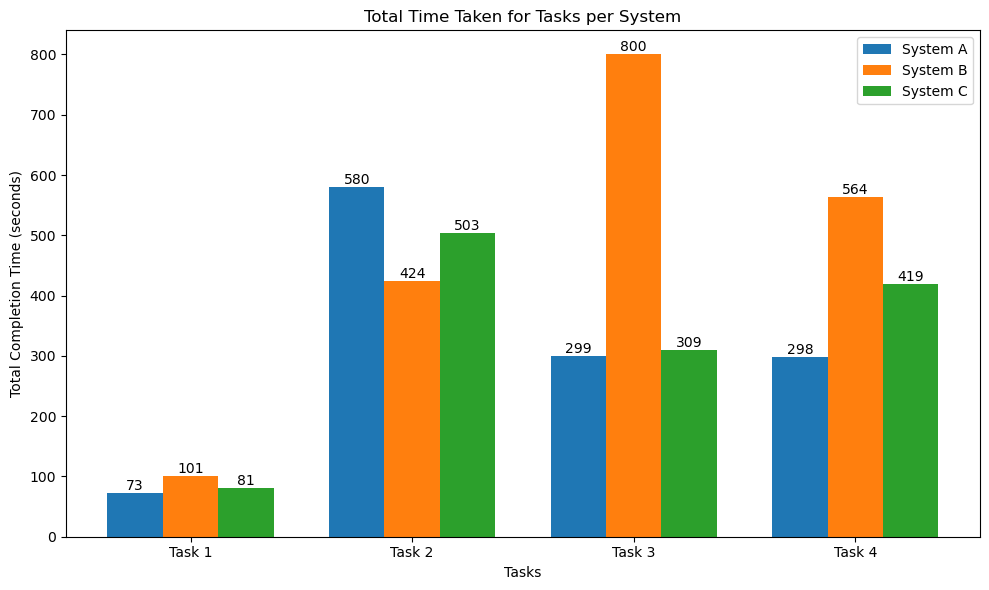

In [3]:
x = np.arange(len(tasks))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
for i, system in enumerate(systems):
    bars = ax.bar(x + (i - 1) * width, [total_time[j][i] for j in range(len(tasks))], width, label=system)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, height, 
                ha='center', va='bottom', fontsize=10)

ax.set_xlabel("Tasks")
ax.set_ylabel("Total Completion Time (seconds)")
ax.set_title("Total Time Taken for Tasks per System")
ax.set_xticks(x)
ax.set_xticklabels(tasks)
ax.legend()


plt.tight_layout()
plt.savefig('Performance1.png')
plt.show()

# Performance 2: Total Score

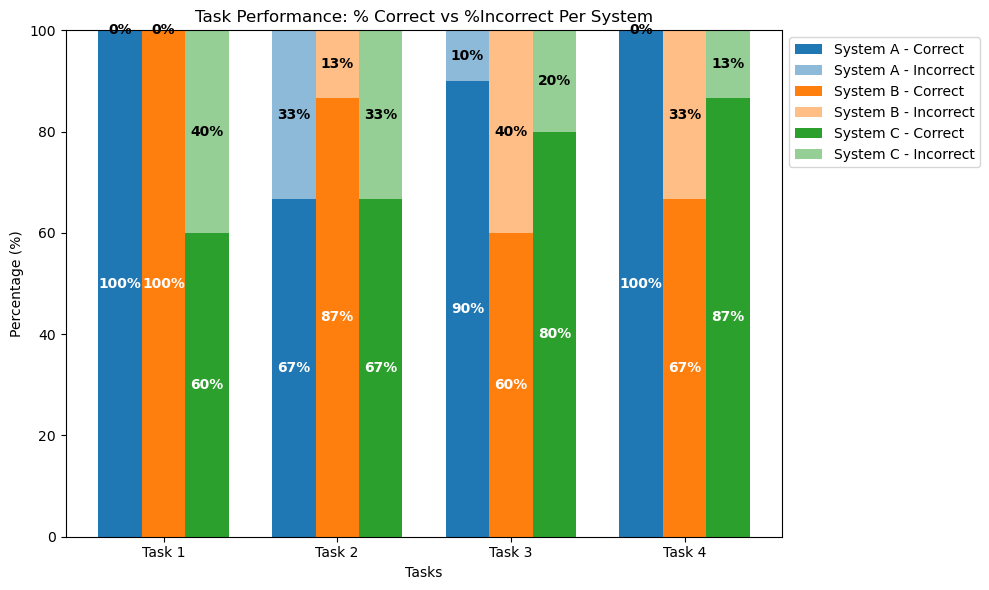

In [4]:
x = np.arange(len(tasks))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

for i, system in enumerate(systems):
    correct_vals = [percentage_correct[j][i] for j in range(len(tasks))]
    incorrect_vals = [percentage_incorrect[j][i] for j in range(len(tasks))]
    
    bars_correct = ax.bar(x + (i - 1) * width, correct_vals, width, label=f'{system} - Correct', color=f'C{i}')
    bars_incorrect = ax.bar(x + (i - 1) * width, incorrect_vals, width, bottom=correct_vals, color=f'C{i}', alpha=0.5, label=f'{system} - Incorrect')
    
    for j in range(len(tasks)):
        total_height = correct_vals[j] + incorrect_vals[j]
        ax.text(x[j] + (i - 1) * width, correct_vals[j] / 2, f'{correct_vals[j]:.0f}%', 
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

        ax.text(x[j] + (i - 1) * width, correct_vals[j] + incorrect_vals[j] / 2, f'{incorrect_vals[j]:.0f}%', 
                ha='center', va='center', color='black', fontsize=10, fontweight='bold')

ax.set_xlabel("Tasks")
ax.set_ylabel("Percentage (%)")
ax.set_title("Task Performance: % Correct vs %Incorrect Per System")
ax.set_xticks(x)
ax.set_xticklabels(tasks)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('Performance2.png')
plt.show()

# Perception: User Difficulty Rating

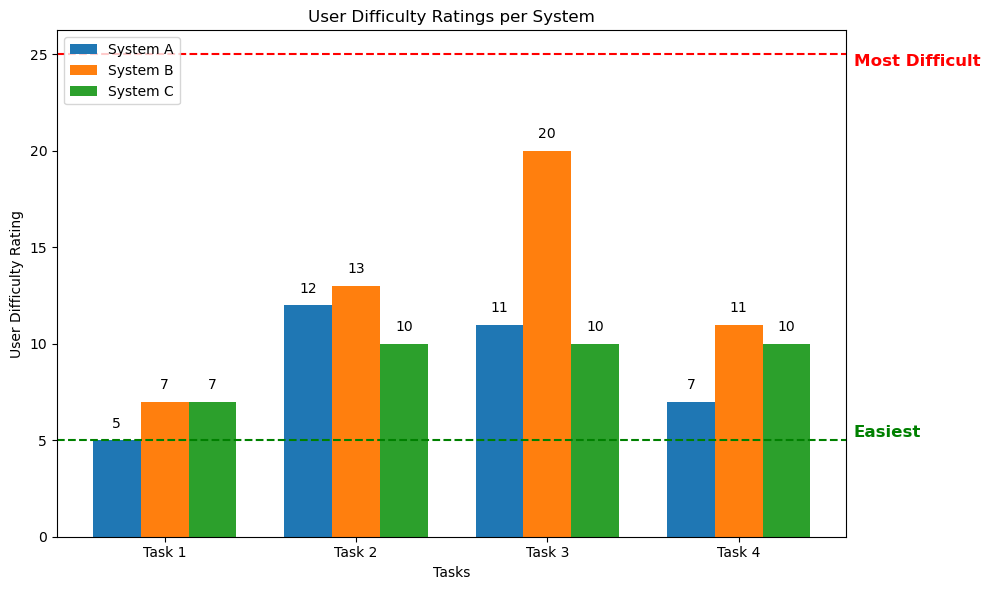

In [5]:
x = np.arange(len(tasks))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

for i, system in enumerate(systems):
    bars = ax.bar(x + (i - 1) * width, [user_ratings[j][i] for j in range(len(tasks))], width, label=system)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, height, 
                ha='center', va='bottom', fontsize=10)


ax.axhline(y=5, color='green', linestyle='dashed', linewidth=1.5)
ax.text(x[-1] + 0.6, 5, 'Easiest', color='green', va='bottom', fontsize=12, fontweight='bold')

ax.axhline(y=25, color='red', linestyle='dashed', linewidth=1.5)
ax.text(x[-1] + 0.6, 25, 'Most Difficult', color='red', va='top', fontsize=12, fontweight='bold')

ax.set_xlabel("Tasks")
ax.set_ylabel("User Difficulty Rating")
ax.set_title("User Difficulty Ratings per System")
ax.set_xticks(x)
ax.set_xticklabels(tasks)
ax.legend(loc=2)

plt.tight_layout()
plt.savefig('Perception.png')
plt.show()

# Preference: Systems

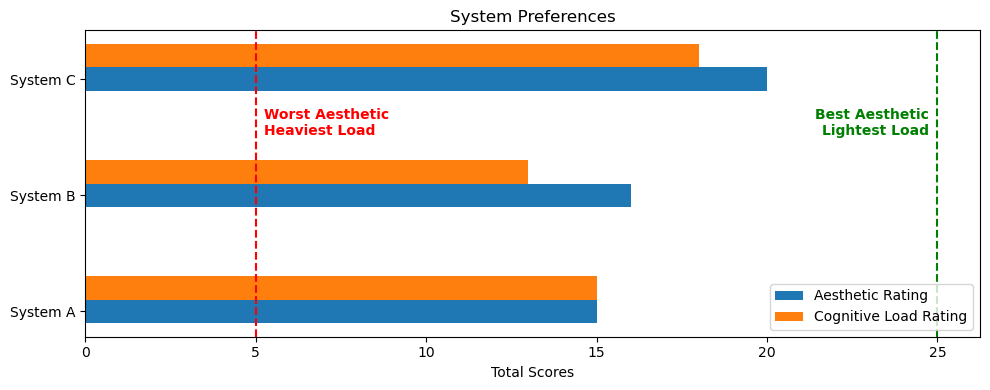

In [6]:
y = np.arange(len(systems))
fig, ax = plt.subplots(figsize=(10, 4))

ax.barh(y, system_preferences[1], 0.2, label="Aesthetic Rating", color='C0')
ax.barh(y + 0.2, system_preferences[2], 0.2, label="Cognitive Load Rating", color='C1')

ax.axvline(x=5, color='red', linestyle='dashed', linewidth=1.5)
ax.axvline(x=25, color='green', linestyle='dashed', linewidth=1.5)

ax.text(5.25, len(systems) - 1.25, 'Worst Aesthetic\nHeaviest Load', color='red', 
        ha='left', va='top', fontsize=10, fontweight='bold',)

ax.text(24.75, len(systems) - 1.25, 'Best Aesthetic\nLightest Load', color='green', 
        ha='right', va='top', fontsize=10, fontweight='bold')

ax.set_xlabel("Total Scores")
ax.set_yticks(y)
ax.set_yticklabels(systems)
ax.set_title("System Preferences")
ax.legend(loc='lower right')

plt.tight_layout()
plt.savefig('Preference.png')
plt.show()